## Introduction

This notebook contains example projects, to show how to use traditional_ml package. This is a continuous project of mine, so I will continue to add traditional ML algorithm to this python package. I will add an example project to this notebook for every algorithm. Project lists are given below-

1. [Linear Regression (with one variable)](#project1)
2. [Linear Regression (with multiple variables)](#project2)

<a id='project1'></a>
### 1. Linear Regression (with one variable)

In this example, I will implement linear regression with one variable to predict profits for a food truck. The dataset is collected from very famous machine learnign course on [Coursera](https://www.coursera.org/learn/machine-learning) by Andrew Ng. I am grateful to the instructors of this course for their easy exaplanations. I highly recommend this course to anyone who is new to machine learning. 

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

Before starting on any task, it is often useful to understand the data by visualizing it. The following cell will load the data and visualize it with our plot function. 

In [1]:
# import necessary modules
import pandas as pd
import numpy as np

import traditional_ml as tml

In [2]:
data = pd.read_csv('./datasets/ex1data1.txt', header=None)
length = len(data)

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


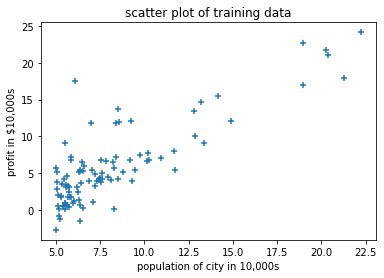

In [4]:
tml.scatter_plot(data[0], data[1], xlabel='population of city in 10,000s',
                    ylabel='profit in $10,000s', title='scatter plot of training data')

Now, we will create features and labels for our regression model. Then we will fit the model using gradient descent function.

In [5]:
X = pd.DataFrame()
X[0] = np.ones((length))
X[1] = data[:][0]
y = data[:][1]
num_feature = X.shape[1]

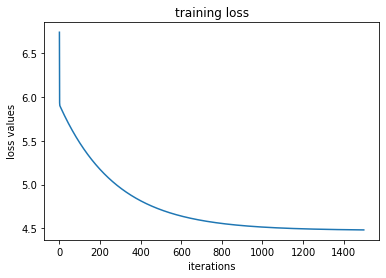

In [6]:
theta = tml.linear_regression.initialize_theta_regression(num_feature)
iterations = 1500
alpha = 0.01 
history, theta = tml.linear_regression.gd(X, y, theta, alpha, iterations)
tml.plot(history, xlabel='iterations', ylabel='loss values', title='training loss')

In [7]:
# print the learned theta values
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [8]:
# predict values with learned theta
print("For population =35,000, we predict a profit of {}".format(
            tml.linear_regression.regression_predict(np.array([1, 3.5]), theta)*10000))

print("For population = 70,000, we predict a profit of {}".format(
            tml.linear_regression.regression_predict(np.array([1, 7.0]), theta)*10000))

For population =35,000, we predict a profit of [4519.7678677]
For population = 70,000, we predict a profit of [45342.45012945]


### Visualize data with linear regression fit

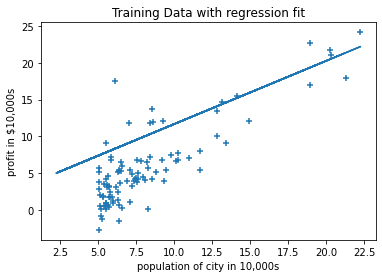

In [9]:
plt = tml.scatter_plot(data[0], data[1], show=False)
tml.plot(X[1], tml.linear_regression.regression_predict(X, theta), xlabel='population of city in 10,000s',
         ylabel='profit in $10,000s', title='Training Data with regression fit')

### Visualize loss surface

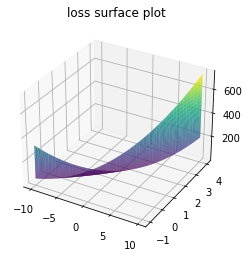

In [10]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

losses = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = np.array([theta0[i], theta1[j]]).reshape(2,1)
        losses[i][j] = tml.linear_regression.mse_loss(X, y, t)

tml.surface_plot(theta0, theta1, losses)

In the above 3D plot, it is difficult to understand the loss surface. So, in the following I will plot the contour plot.

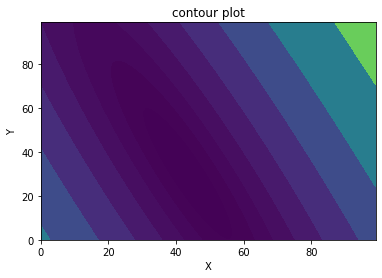

In [11]:
tml.contour_plot(losses, levels=np.logspace(-2, 3, 20))

From the above diagrams and the loss curve, it is clear that the model learn the data well.

<a id='project2'></a>
### 2. Linear Regression (with multiple variables)

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [12]:
# import necessary modules
import pandas as pd
import numpy as np

import traditional_ml as tml

In [13]:
# lets look at the data first
data = pd.read_csv('./datasets/ex1data2.txt', header=None)
m = len(data[0])
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


From the above, it is clear that the feature range is not same. So, we have to normalize the data. 

In [14]:
X_norm, mu, sigma = tml.linear_regression.feature_normalize(data.loc[:, 0:1])
X = pd.DataFrame()

X[0] = np.ones((m))
X[1] = X_norm[0]
X[2] = X_norm[1]
num_feature = X.shape[1]
 
y = data[data.columns[-1]]

Next, we will run gradient descent in the similar way as above. 

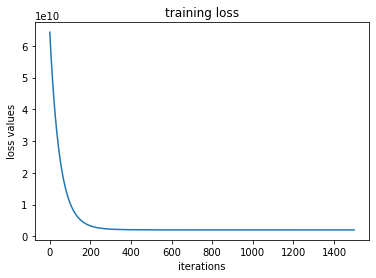

In [15]:
theta = tml.linear_regression.initialize_theta_regression(num_feature)
iterations = 1500
alpha = 0.01

history, theta = tml.linear_regression.gd(X, y, theta, alpha, iterations)
tml.plot(history, xlabel='iterations', ylabel='loss values', title='training loss')

From the above curve, it is clear that the model train is successful.